In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [86]:
# Load the data
data = pd.read_csv('TSLA.csv') 
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

features = ['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,2022,11,1
1,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,2022,11,2
2,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,2022,11,3
3,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200,2022,11,4
4,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,2022,11,7


In [87]:
# Train-test split
X = data[features]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [88]:
#For Training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [89]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(6.423877055556529, 0.9963454744222136)

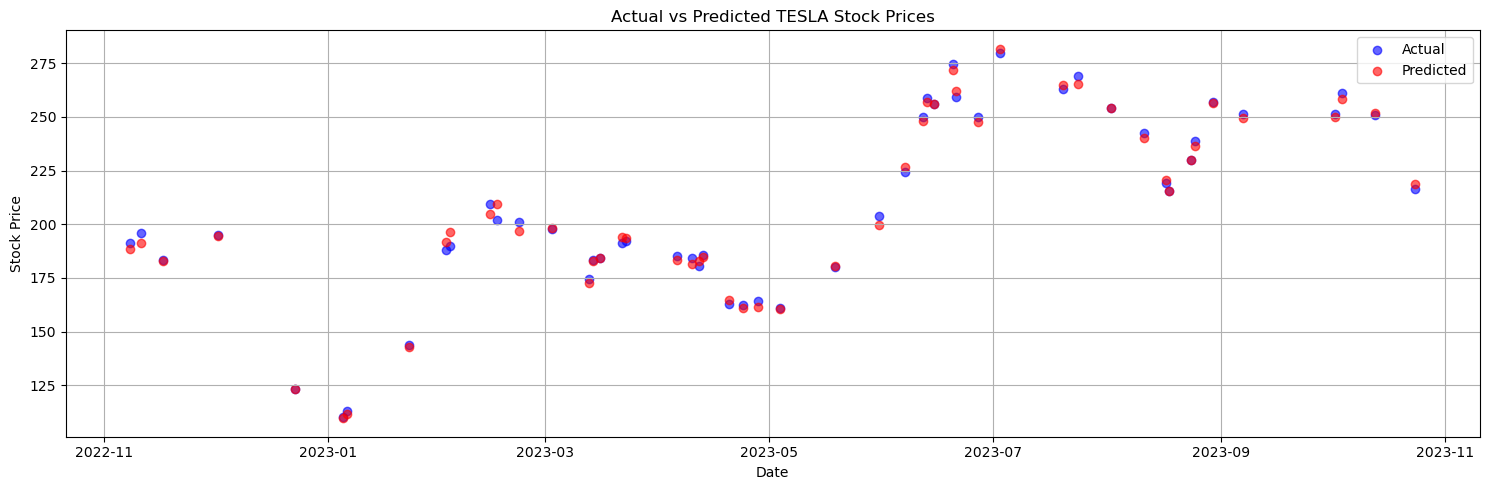

In [90]:
plt.figure(figsize=(15, 5))

# Actual values
plt.scatter(data.loc[y_test.index, 'Date'], y_test, color='blue', label='Actual', alpha=0.6)

# Predicted values
plt.scatter(data.loc[y_test.index, 'Date'], y_pred, color='red', label='Predicted', alpha=0.6)

plt.title('Actual vs Predicted TESLA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
print(f"Prediction R^2 Score: {r2 * 100:.2f}%")

Prediction R^2 Score: 99.63%
